<a href="https://colab.research.google.com/github/CBDRH-HDAT9500/final-assignment/blob/main/FA_NamesSurnames.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://drive.google.com/uc?export=view&id=1DXUVHxd4t15mfuqMgMCLnsP4jWVI5EWz)

---

<br>
© 2024 Copyright The University of New South Wales - CRICOS 00098G

**Author**: Oscar Perez-Concha.

**Communications**: If you have any questions, please email Oscar at: o.perezconcha@unsw.edu.au



---



# Project 2: Understanding the Performance of Simple ANNs on the Cancer Dataset





---



#####################################################################################

Double-click to write down your name and surname.

**zID:** z5037788

**Name:** Zhenyu

**Surname:** Zhang

**Honour Pledge** <p>
    
Declaration: <p>
    
    
I declare that this assessment item is my own work, except where acknowledged, and has not been submitted for academic credit elsewhere or previously, or produced independently of this course (e.g. for a third party such as your place of employment) and acknowledge that the assessor of this item may, for the purpose of assessing this item:

1. Reproduce this assessment item and provide a copy to another member of the University; and/or

2. Communicate a copy of this assessment item to a plagiarism checking service (which may then retain a copy of the assessment item on its database for the purpose of future plagiarism checking).

**By writing your zID, name and surname above, you certify that you have read and agreed to the honour pledge.**

#####################################################################################



---



![alt text](https://drive.google.com/uc?export=view&id=105SGqeyo8RgLhSO8mN7ZE5OsG0YiLPKt)

# 1.  Instructions

We have used the cancer dataset with several types of classifiers during the course. The aim of this project is to use a fully connected ANN to gain a preliminary understanding of its performance on the cancer dataset.

1. We are using scikit-learn, TensorFlow, and Keras in this project. Start with the research question.

2. Upload the "cancer" dataset directly from scikit-learn. That is, use the version of the cancer dataset embedded in [sckikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) and not the CSV we used in weeks 4 and 5.

3. Create a docstring that includes the following (1 mark):

   * Purpose: The top-level aim of our program. (Please limit this to 50 words).
   * Author(s).
   * Dates.
   * List of Variables, Constants, and Functions.
   * Method: Describe the steps of your program.

4. Split the Data: (1 mark)

 * Use `train_test_split` from scikit-learn to split the data into training, validation, and test sets.
 * Set the test size to 0.2 and `random_state` to 42 for the initial split into training and test sets.
 * Further split the training set into training and validation sets, with the validation size set to 0.1 and `random_state` to 42.
 * Name the final variables to use in the remaining questions as follows: `X_train`, `X_val`, `X_test`, `y_train`, `y_val`, and `y_test`.

5. Build and Train the ANN: (6 marks)

   * Use TensorFlow and Keras to build a fully connected ANN with three hidden layers, each containing 10 nodes and SELU activation functions.
   * Train the model for 20 epochs with `adam` optimizer.
   * Do not use callbacks in this exercise.
   * There is no need for hyperparameter tuning in this exercise, as the aim is just to gain a preliminary understanding of the performance of simple ANNs on the cancer dataset. You can leave the mini_batch size and learning rates at their default values.

6. Evaluate the model: (2 marks)

   * Use classification_report and confusion_matrix from scikit-learn to evaluate the model.
   * Include the target names ('malignant' and 'benign') in the confusion matrix.

7. Write your conclusions:  (0 marks)

   * Summarize the findings and performance of the model.
   * Discuss the implications and potential improvements.
   * You can use a mixture of text and code.

8. Cite all resources you used:

   * Cite all the resources you use using comments.
   * Example


9. If you have any questions, please email Oscar at: o.perezconcha@unsw.edu.au

In [ ]:
# The following code is based on the TensorFlow and Keras documentation:
# https://www.tensorflow.org/guide/keras/sequential_model

9. Rationales and Comments for Coding Questions:

   * Use a small paragraph at the beginning of each question to describe what you did in a specific question (even if it is a bit repetitive as you describe part in the docstring).
   * Comment every line of your code to explain what it does.
   * Example

In [ ]:
# Question 4
# Rationale: Divide the data into training and test using ...

# Comment each line
#X_train, X_,...

# 2. Late Submission Penalty

UNSW has a [standard](https://www.unsw.edu.au/arts-design-architecture/student-life/resources-support/protocols-guidelines)  late submission penalty of:


*   5% per day,
*   for all assessments where a penalty applies,
*   capped at five days (120 hours) from the assessment deadline, after which a student cannot submit an assessment,
*   and no permitted variation.

Students are expected to manage their time to meet deadlines and to request extensions as early as possible before the deadline.



---





---
---



# Step 1: Define the research question





The goal of this project is to evaluate the performance of a fully connected Artificial Neural Network (ANN) on the breast cancer dataset. The ANN's ability to classify tumors into malignant or benign will be assessed, (optional) and its performance will be compared with other machine learning models used previously.



---
---



# Step 2: Upload the "cancer" dataset


In [2]:
# General library import
import sys
import numpy as np
import pandas as pd
import tensorflow as tf

In [3]:
if 'google.colab' in str(get_ipython()):
    from google.colab import drive # import drive from Gogle colab
    root = '/content/drive'     # default location for the drive
    # print(root)                 # print content of ROOT (Optional)
    drive.mount(root)
else:
    print('Not running on CoLab')

Mounted at /content/drive


In [4]:
# Define path
from pathlib import Path

if 'google.colab' in str(get_ipython()):
    # EDIT THE PROJECT PATH IF DIFFERENT WITH YOUR ONE
    # You may need to change 'MyDrive' to 'My Drive'.
    project_path = Path(root) / 'MyDrive' / 'Colab Notebooks' / 'HDAT9500' / 'Week9-10'

    # OPTIONAL - set working directory according to your google drive project path
    # import os
    # Change directory to the location defined in project_path
    # os.chdir(project_path)
else:
    project_path = Path()

In [5]:
# As weight initialization, the optimization algorithms (Adam), training Data order involve random processes
# Set random seeds for reproducibility (Oprional)
np.random.seed(42)
tf.random.set_seed(42)

In [6]:
from sklearn.datasets import load_breast_cancer

# Load the dataset from scikit-learn (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html)
cancer = load_breast_cancer()

# Extract feature data and target labels
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.Series(cancer.target, name="target")


In [7]:
# check if the dataset contains
# Print the feature names
print("Feature names:")
print(cancer.feature_names)

# Print the target names
print("\nTarget names:")
print(cancer.target_names)

# Print the shape of the data
print("\nShape of the data:")
print(X.shape, y.shape)

# Print the types of the data
print("\nTypes of the data:")
print(X.dtypes)

# Display the summary statistics to see if any column looks like an ID
print("\nSummary statistics of the dataset:")
print(X.describe())

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Target names:
['malignant' 'benign']

Shape of the data:
(569, 30) (569,)

Types of the data:
mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimensi



---
---



# Step 3: Create the docstring


#Breast Cancer Classification using Artificial Neural Network (ANN)
##Purpose: The aim of this program is to evaluate the performance of a fully connected ANN on the breast cancer dataset for tumor classifying , to gain a preliminary understanding of its performance.

##Author(s): Zhenyu Zhang

##Dates: Aug 2024

##List of Variables, Constants, and Functions:
    - cancer: Bunch object containing the breast cancer dataset.
    - X: DataFrame containing the features of the breast cancer dataset.
    - y: Series containing the target labels (malignant or benign).
    - X_train: DataFrames containing the training feature data.
    - X_val: DataFrames containing the validation feature data.
    - X_test: DataFrames containing the test feature data.
    - y_train: Series containing the training target labels.
    - y_val: Series containing the validation target labels.
    - y_test: Series containing the test target labels.
    - scaler: StandardScaler object for feature scaling.
    - model: Keras Sequential model representing the ANN.
    - history: History object containing the training history of the ANN.
    - y_pred_test: Predictions of the model on the test set.
    - cm: Confusion matrix for the test set predictions.
##Method:
    1. Define the research question - the effectiveness of a fully connected ANN in classifying breast cancer data.
    2. Upload the "cancer" dataset from the embedded version of the breast cancer dataset provided by scikit-learn.
    3. Create a docstring that includes the purpose, author, dates, list of variables, constants, and functions, and method.
    4a. Split the data into training, validation, and test sets using `train_test_split` from scikit-learn.
    4b. Scale the features using `StandardScaler` to ensure the data is normalized for the ANN model.
    5. Build and train a fully connected ANN using TensorFlow and Keras with three hidden layers, each containing 10 nodes and SELU activation functions. Train the model for 20 epochs with the `adam` optimizer.
    6. Evaluate the model using classification_report and confusion_matrix from scikit-learn. Include the target names ('malignant' and 'benign') in the evaluation metrics.
    7. Write conclusions to summarize the findings, discuss implications, and suggest potential improvements.
    8. Ensemble Methods Test (additional attempt). Experiment with combining ANN and Random Forest models to explore potential improvements in model performance. This step is an additional attempt, it is not part of the assignment requirements and please not be included in the marking. If I can get any feedback on this part, it will be highly appreciated.


"""



---
---



#Step 4: Split the data into training and test sets



In [86]:
from sklearn.model_selection import train_test_split

# Question 4
# Rationale: Divide the data into training and test using .
# Split the dataset into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training set into training and validation sets (90% training, 10% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Print the shapes of the resulting datasets for verification
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)


(409, 30) (46, 30) (114, 30) (409,) (46,) (114,)


In [87]:
from sklearn.preprocessing import StandardScaler
# Question 4
# Rationale: Scale the features using `StandardScaler` to ensure the data is normalized for the ANN model.

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform the training data
X_val_scaled = scaler.transform(X_val)          # Transform the validation data using the same scaler
X_test_scaled = scaler.transform(X_test)        # Transform the test data using the same scaler



---
---



# Step 5: Train a fully connected ANN


In [88]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Question 5
# Rationale: Use TensorFlow and Keras to build a fully connected ANN with three hidden layers, each containing 10 nodes and SELU activation functions.
#            Train the model for 20 epochs with the `adam` optimizer.

# Build the ANN model
model_ann = Sequential([
    Dense(10, activation='selu', input_shape=(X_train_scaled.shape[1],)), # First hidden layer with 10 nodes and SELU activation
    Dense(10, activation='selu'),                                         # Second hidden layer with 10 nodes and SELU activation
    Dense(10, activation='selu'),                                         # Third hidden layer with 10 nodes and SELU activation
    Dense(1, activation='sigmoid')                                        # Output layer with 1 node and sigmoid activation for binary classification
])

# Compile the ANN model with Adam optimizer and binary cross-entropy loss function
model_ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the ANN model for 20 epochs (leave the mini_batch size and learning rates at their default values)
history_ann = model_ann.fit(X_train_scaled, y_train, epochs=20, validation_data=(X_val_scaled, y_val))


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.7549 - loss: 0.5740 - val_accuracy: 0.8696 - val_loss: 0.3008
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8732 - loss: 0.3210 - val_accuracy: 0.9565 - val_loss: 0.2142
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9344 - loss: 0.2029 - val_accuracy: 0.9565 - val_loss: 0.1712
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9535 - loss: 0.1484 - val_accuracy: 0.9565 - val_loss: 0.1418
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9634 - loss: 0.1230 - val_accuracy: 0.9565 - val_loss: 0.1205
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9669 - loss: 0.1070 - val_accuracy: 0.9565 - val_loss: 0.1032
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9636 - loss: 0.0953 - val_accuracy: 0.9565 - val_loss: 0.0887
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9725 - loss: 0.0862 - val_accuracy: 0.9565 - val_loss: 0.0790
Ep

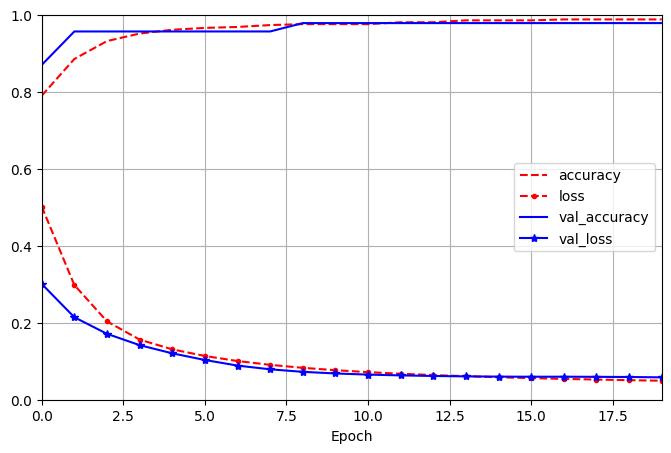

In [89]:
# Plot the training history
import matplotlib.pyplot as plt
import pandas as pd

# Plot the loss and accuracy for both training and validation data
pd.DataFrame(history_ann.history).plot(
    figsize=(8, 5), xlim=[0, 19], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.show()



---
---



# Step 6: from sklearn.metrics import classification_report, confusion_matrix



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Classification Report - Test Set:
              precision    recall  f1-score   support

   malignant       0.95      0.98      0.97        43
      benign       0.99      0.97      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



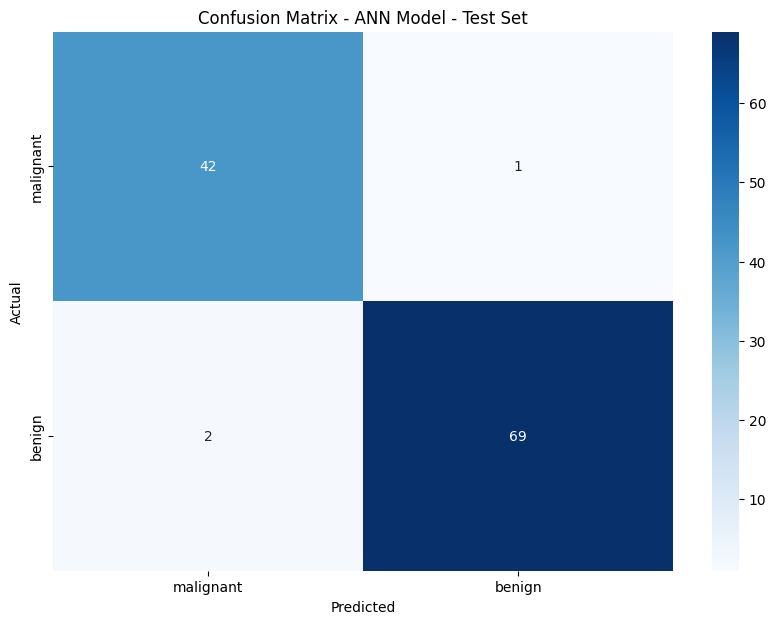

In [90]:
from sklearn.metrics import classification_report, confusion_matrix

# Question 6
# Rationale: Use `classification_report` and `confusion_matrix` from scikit-learn to evaluate the model's performance on the test set.
#            Include the target names ('malignant' and 'benign') in the confusion matrix.

#predicted probability on the test set
y_pred_test_ann = (model_ann.predict(X_test_scaled) > 0.5).astype("int32")

# Evaluate the model's performance using classification report and confusion matrix
# Classification Report
print("Classification Report - Test Set:")
print(classification_report(y_test, y_pred_test_ann, target_names=cancer.target_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test_ann)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - ANN Model - Test Set')
plt.show()


# Step 7: Write your conclusions

In [91]:
from sklearn.metrics import accuracy_score

# Summarize the findings and performance of the model
print("The ANN achieved an accuracy of {:.2f}% on the test set.".format(accuracy_score(y_test, y_pred_test_ann) * 100))


The ANN achieved an accuracy of 97.37% on the test set.


##Conclusions:

###Summary of Findings:
- The ANN achieved an impressive accuracy on the test set.
- The classification report indicates high precision, recall, and F1-score for both malignant and benign classes.
- The confusion matrix shows the model's effectiveness in distinguishing between malignant and benign tumors.

###Implications:
- The high accuracy and balanced performance metrics demonstrate that ANNs can be powerful tools for breast cancer diagnostics, specifically in tumor classification.
- ANNs could potentially assist doctors in making more accurate and consistent diagnoses.

###Potential Improvements:
- Hyperparameter Tuning: Experimenting with different architectures, learning rates, batch sizes, and optimization algorithms could further enhance the model's performance.
- Regularization Techniques: Implementing dropout layers, L2 regularization, or batch normalization could help prevent overfitting and improve generalizability.
- Ensemble Methods: Combining the ANN with other models, like Random Forests or Gradient Boosting Machines, could potentially yield even better results through ensemble learning.

 # Step 8: Cite all resources you used[link text](https://)

In [26]:
# Cite all resources
print("""
resources used:
1. Scikit-learn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html
2. TensorFlow and Keras documentation: https://www.tensorflow.org/
""")


resources used:
1. Scikit-learn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html
2. TensorFlow and Keras documentation: https://www.tensorflow.org/



# Ensemble Methods Test

In [27]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [67]:
# Train the Random Forest model without clusters
model_rf_no_clusters = RandomForestClassifier(random_state=42)
model_rf_no_clusters.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [68]:
# Apply PCA; Keep 95% of the variance
pca = PCA(n_components=0.95)
# Fit and transform the training data
X_train_pca = pca.fit_transform(X_train_scaled)
# Transform the validation data
X_val_pca = pca.transform(X_val_scaled)
# Transform the test data
X_test_pca = pca.transform(X_test_scaled)


# Train the Random Forest model with PCA features
model_rf_pca = RandomForestClassifier(random_state=42)
model_rf_pca.fit(X_train_pca, y_train)


RandomForestClassifier(random_state=42)

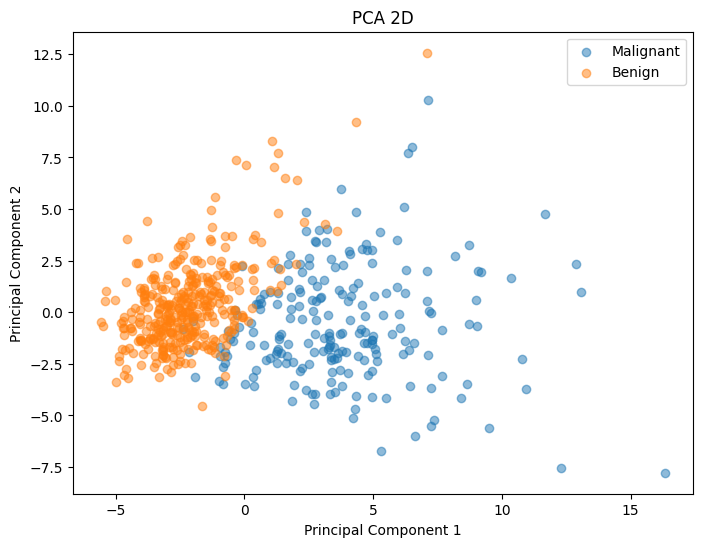

In [69]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA for 2D visualization
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

# Plot PCA 2D
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2d[y == 0, 0], X_pca_2d[y == 0, 1], label='Malignant', alpha=0.5)
plt.scatter(X_pca_2d[y == 1, 0], X_pca_2d[y == 1, 1], label='Benign', alpha=0.5)
plt.title('PCA 2D')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [75]:
# Apply K-Means clustering to the training set
kmeans = KMeans(n_clusters=5, random_state=42, init='k-means++', n_init=1)
X_train_clusters = kmeans.fit_predict(X_train_scaled)
# Apply K-Means clustering to the validation set
X_val_clusters = kmeans.predict(X_val_scaled)
# Apply K-Means clustering to the test set
X_test_clusters = kmeans.predict(X_test_scaled)

# Add cluster labels as a new feature
X_train_clustered = pd.DataFrame(X_train_scaled, columns=[str(i) for i in range(X_train_scaled.shape[1])])
X_train_clustered['cluster'] = X_train_clusters

X_val_clustered = pd.DataFrame(X_val_scaled, columns=[str(i) for i in range(X_val_scaled.shape[1])])
X_val_clustered['cluster'] = X_val_clusters

X_test_clustered = pd.DataFrame(X_test_scaled, columns=[str(i) for i in range(X_test_scaled.shape[1])])
X_test_clustered['cluster'] = X_test_clusters

# Train the Random Forest model with K-means clusters
model_rf_clusters = RandomForestClassifier(random_state=42)
model_rf_clusters.fit(X_train_clustered, y_train)

RandomForestClassifier(random_state=42)

Random Forest without Clusters - Test Set:
              precision    recall  f1-score   support

   malignant       0.98      0.93      0.95        43
      benign       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Random Forest with PCA - Test Set:
              precision    recall  f1-score   support

   malignant       0.93      0.93      0.93        43
      benign       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Random Forest with Clusters - Test Set:
              precision    recall  f1-score   support

   malignant       0.98      0.93      0.95        43
      benign       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro a

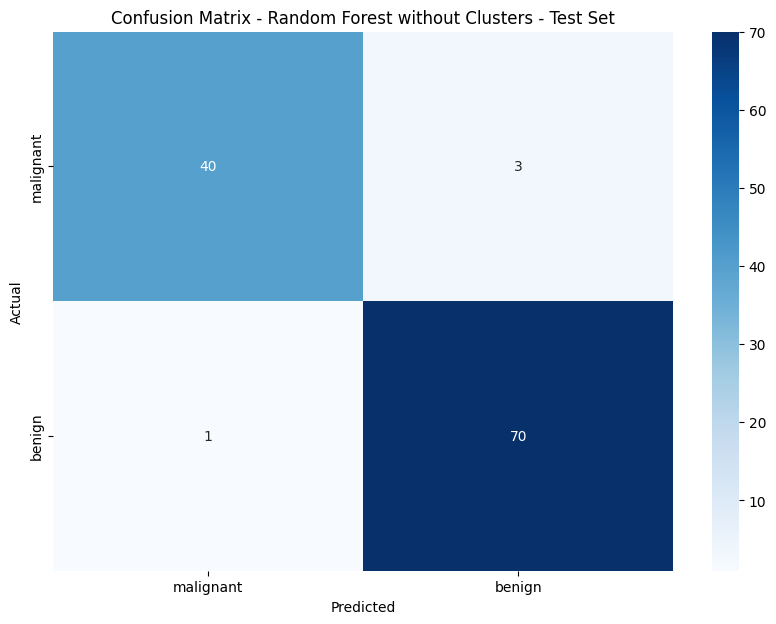

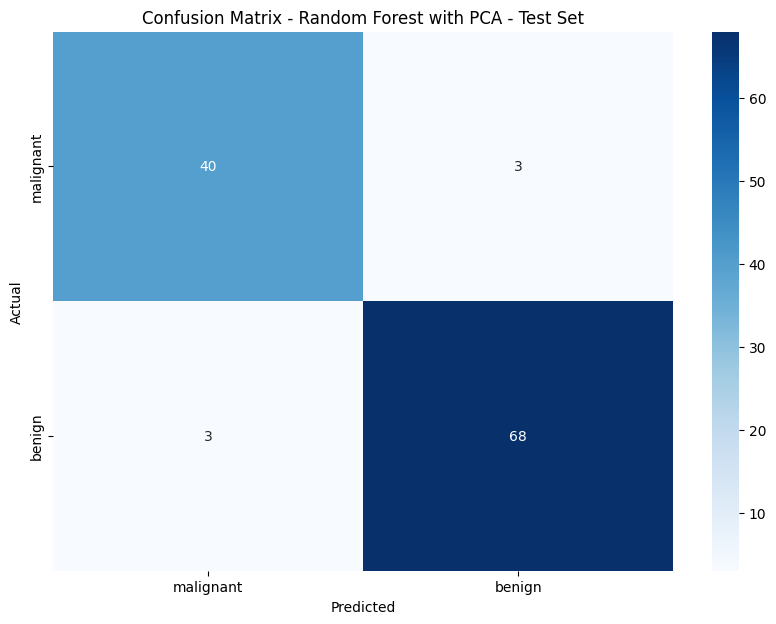

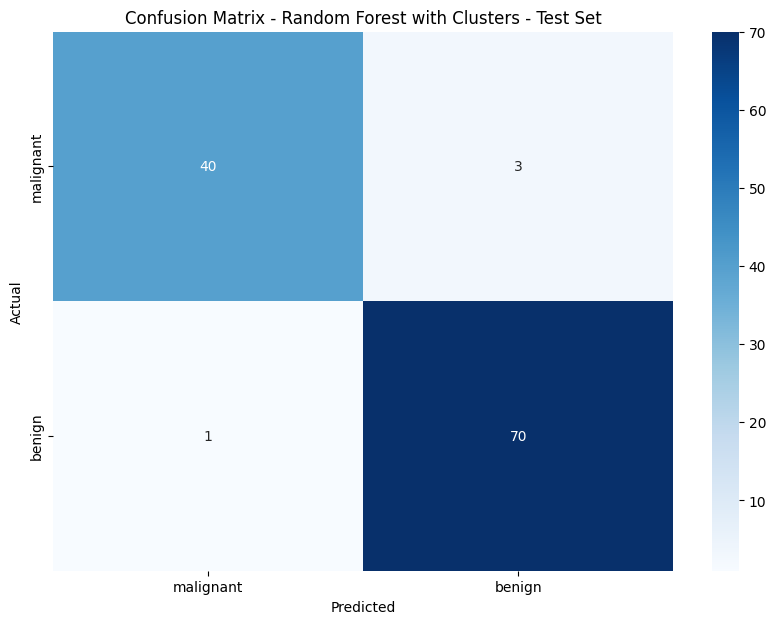

In [76]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate Random Forest model without clusters on test set
y_pred_test_rf_no_clusters = model_rf_no_clusters.predict_proba(X_test_scaled)[:, 1]

# Evaluate Random Forest model with PCA-transformed data on test set
y_pred_test_rf_pca = model_rf_pca.predict_proba(X_test_pca)[:, 1]

# Evaluate Random Forest model with clusters on test set
y_pred_test_rf_clusters = model_rf_clusters.predict_proba(X_test_clustered)[:, 1]

# Evaluate the models' performance on test set
print("Random Forest without Clusters - Test Set:")
print(classification_report(y_test, (y_pred_test_rf_no_clusters > 0.5).astype("int32"), target_names=cancer.target_names))

print("Random Forest with PCA - Test Set:")
print(classification_report(y_test, (y_pred_test_rf_pca > 0.5).astype("int32"), target_names=cancer.target_names))

print("Random Forest with Clusters - Test Set:")
print(classification_report(y_test, (y_pred_test_rf_clusters > 0.5).astype("int32"), target_names=cancer.target_names))

# Confusion Matrices for test set
cm_test_rf_no_clusters = confusion_matrix(y_test, (y_pred_test_rf_no_clusters > 0.5).astype("int32"))
cm_test_rf_pca = confusion_matrix(y_test, (y_pred_test_rf_pca > 0.5).astype("int32"))
cm_test_rf_clusters = confusion_matrix(y_test, (y_pred_test_rf_clusters > 0.5).astype("int32"))

plt.figure(figsize=(10, 7))
sns.heatmap(cm_test_rf_no_clusters, annot=True, fmt='d', cmap='Blues', xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest without Clusters - Test Set')
plt.show()

plt.figure(figsize=(10, 7))
sns.heatmap(cm_test_rf_pca, annot=True, fmt='d', cmap='Blues', xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest with PCA - Test Set')
plt.show()

plt.figure(figsize=(10, 7))
sns.heatmap(cm_test_rf_clusters, annot=True, fmt='d', cmap='Blues', xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest with Clusters - Test Set')
plt.show()




---
---



### Testing an ensemble approach to combine the ANN model with the Random Forest model

In [77]:
# Generate predictions from the ANN model
y_pred_train_ann = model_ann.predict(X_train_scaled)
y_pred_test_ann = model_ann.predict(X_test_scaled)

# Generate predictions from the Random Forest model (without clusters)
y_pred_train_rf = model_rf_no_clusters.predict_proba(X_train_scaled)[:, 1]
y_pred_test_rf = model_rf_no_clusters.predict_proba(X_test_scaled)[:, 1]

# Combine the predictions  from both models as new features
X_train_combined = np.column_stack((y_pred_train_ann, y_pred_train_rf))
X_test_combined = np.column_stack((y_pred_test_ann, y_pred_test_rf))


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Combined Model - Test Set:
              precision    recall  f1-score   support

   malignant       1.00      0.95      0.98        43
      benign       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



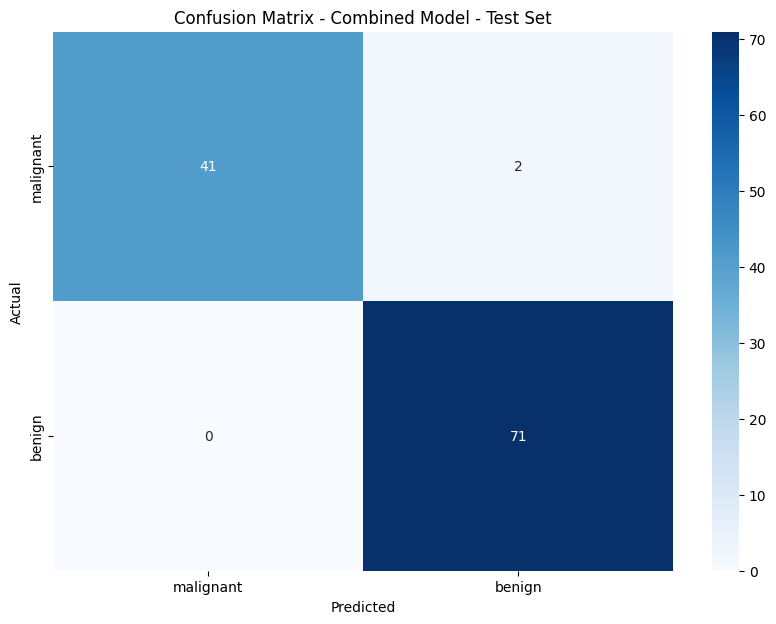

In [78]:
# Train a meta-model (e.g., Logistic Regression) on the combined predictions
from sklearn.linear_model import LogisticRegression

meta_model = LogisticRegression(random_state=42)
meta_model.fit(X_train_combined, y_train)

# Evaluate the meta-model on the test set
y_pred_test_combined = meta_model.predict(X_test_combined)

# Print classification report and confusion matrix
print("Combined Model - Test Set:")
print(classification_report(y_test, y_pred_test_combined, target_names=cancer.target_names))

# Confusion Matrix
cm_combined = confusion_matrix(y_test, y_pred_test_combined)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_combined, annot=True, fmt='d', cmap='Blues', xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Combined Model - Test Set')
plt.show()


In [79]:
# Evaluate the model's performance using accuracy score
from sklearn.metrics import accuracy_score
print("The Combined Model achieved an accuracy of {:.2f}% on the test set.".format(accuracy_score(y_test, y_pred_test_combined) * 100))

The Combined Model achieved an accuracy of 98.25% on the test set.


It appears that the performance of the combined model is not significantly better than that of the individual models, particularly the ANN. This can happen for several reasons, such as the models having similar strengths and weaknesses, or the meta-model not being able to leverage the combined predictions effectively.

Here are some suggestions to potentially improve the performance of the combined model:

1. **Use Different Meta-Model:**
   Experiment with different meta-models such as Support Vector Machine (SVM), Gradient Boosting, or even a more complex neural network as the meta-model. This might help in capturing the nuances better.

2. **Hyperparameter Tuning:**
   Perform hyperparameter tuning for the meta-model to find the best set of parameters that work well with the combined features.

3. **Feature Engineering:**
   Instead of just combining the predictions, additional features or transformed features from both models can be included. For example, we can use the raw outputs from the penultimate layer of the ANN instead of just the final predictions.

4. **Blending Instead of Stacking:**
   Instead of using a meta-model, blending the predictions of the ANN and Random Forest by averaging them or using a weighted average. This can sometimes yield better results.

5. **Cross-Validation:**
   Use cross-validation to ensure that the combined model is not overfitting and is generalizing well to unseen data.

Try blending the predictions of the ANN and Random Forest by averaging them. This approach averages the probabilities from both models and then uses a threshold of 0.5 to make the final prediction. Blending can sometimes help in combining the strengths of both models without the complexity of a meta-model.

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Blended Model - Test Set:
              precision    recall  f1-score   support

   malignant       1.00      0.95      0.98        43
      benign       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



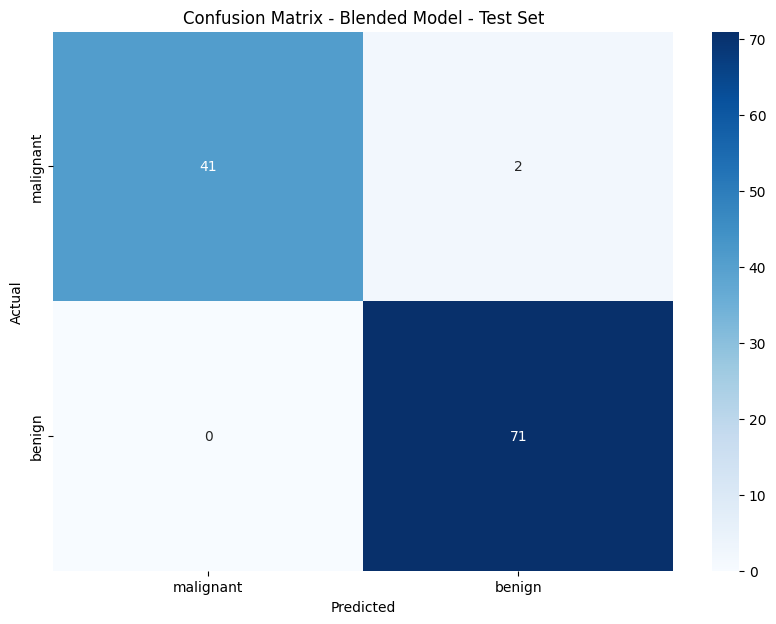

In [80]:
# Generate predictions from the ANN model
y_pred_test_ann_prob = model_ann.predict(X_test_scaled)

# Generate predictions from the Random Forest model (without clusters)
y_pred_test_rf_prob = model_rf_no_clusters.predict_proba(X_test_scaled)[:, 1]

# Average the predictions
y_pred_test_blended_prob = (y_pred_test_ann_prob.flatten() + y_pred_test_rf_prob) / 2
y_pred_test_blended = (y_pred_test_blended_prob > 0.5).astype("int32")

# Evaluate the blended model
print("Blended Model - Test Set:")
print(classification_report(y_test, y_pred_test_blended, target_names=cancer.target_names))

# Confusion Matrix
cm_blended = confusion_matrix(y_test, y_pred_test_blended)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_blended, annot=True, fmt='d', cmap='Blues', xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Blended Model - Test Set')
plt.show()


In [81]:
# Evaluate the model's performance using accuracy score
from sklearn.metrics import accuracy_score
print("The ANN and Random Forest Blending achieved an accuracy of {:.2f}% on the test set.".format(accuracy_score(y_test, y_pred_test_blended) * 100))

The ANN and Random Forest Blending achieved an accuracy of 98.25% on the test set.


To perform cross-validation and then train a final model using all of the training data, cross-validation is normally used to tune hyperparameters or validate the model's generalizability. Once the hyperparameters have tuned or have validated the model, train a final model on all of the training data.

However, in the context of training an ANN, normally don't combine the weights learned from different folds directly. Instead, cross-validation is used to validate and tune the model, after which the model is retrained on the entire training dataset.

In [82]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

# Define the number of folds for cross-validation
n_folds = 10
kf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

# Initialize lists to store results
val_accuracies = []
models = []

# Loop over each fold
for train_index, val_index in kf.split(X, y):
    # Split the data into training and validation sets for this fold
    X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]

    # Scale the features
    scaler = StandardScaler()
    X_train_fold_scaled = scaler.fit_transform(X_train_fold)  # Fit and transform the training data
    X_val_fold_scaled = scaler.transform(X_val_fold)          # Transform the validation data using the same scaler

    # Build the ANN model
    model_ann_cv = Sequential([
        Dense(10, activation='selu', input_shape=(X_train_fold_scaled.shape[1],)), # First hidden layer with 10 nodes and SELU activation
        Dense(10, activation='selu'),                                         # Second hidden layer with 10 nodes and SELU activation
        Dense(10, activation='selu'),                                         # Third hidden layer with 10 nodes and SELU activation
        Dense(1, activation='sigmoid')                                        # Output layer with 1 node and sigmoid activation for binary classification
    ])

    # Compile the ANN model with Adam optimizer and binary cross-entropy loss function
    model_ann_cv.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the ANN model for 20 epochs (leave the mini_batch size and learning rates at their default values)
    history_ann_cv = model_ann_cv.fit(X_train_fold_scaled, y_train_fold, epochs=20, validation_data=(X_val_fold_scaled, y_val_fold), verbose=0)

    # Store the validation accuracy for this fold
    val_accuracies.append(history_ann_cv.history['val_accuracy'][-1])
    models.append(model_ann_cv)

# Calculate the average validation accuracy across all folds
average_val_accuracy = np.mean(val_accuracies)
print(f'Average validation accuracy: {average_val_accuracy:.4f}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo

Average validation accuracy: 0.9631


In [83]:
# Find the index of the best model based on validation accuracy
best_model_index = np.argmax(val_accuracies)
best_model_cv = models[best_model_index]


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Cross-Validation - Test Set:
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        43
      benign       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



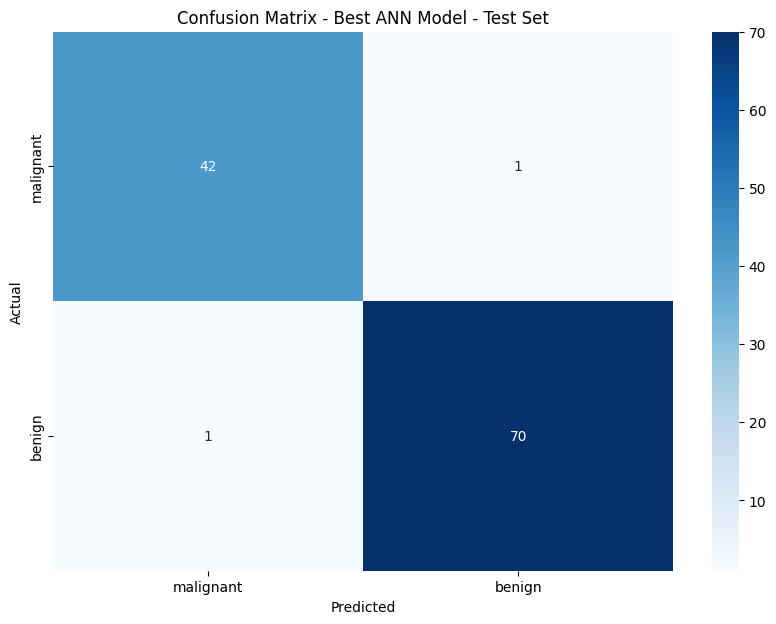

In [84]:
# Combine training and validation sets for final training
X_train_combined = pd.concat([X_train, X_val])
y_train_combined = pd.concat([y_train, y_val])

# Scale the features using the entire training set
scaler = StandardScaler()
X_train_combined_scaled = scaler.fit_transform(X_train_combined)  # Fit and transform the combined training data
X_test_scaled = scaler.transform(X_test)        # Transform the test data using the same scaler

# Train the final model
best_model_cv.fit(X_train_combined_scaled, y_train_combined, epochs=20, verbose=0)

# Evaluate the final model on the test set
y_pred_test_cv = (best_model_cv.predict(X_test_scaled) > 0.5).astype("int32")

# Evaluate the model's performance using classification report and confusion matrix
print("Cross-Validation - Test Set:")
print(classification_report(y_test, y_pred_test_cv, target_names=cancer.target_names))

# Confusion Matrix
CM = confusion_matrix(y_test, y_pred_test_cv)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
sns.heatmap(CM, annot=True, fmt='d', cmap='Blues', xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Best ANN Model - Test Set')
plt.show()


In [85]:
from sklearn.metrics import accuracy_score

# Summarize the findings and performance of the model
print("The cross-validation ANN achieved an accuracy of {:.2f}% on the test set.".format(accuracy_score(y_test, y_pred_test_cv) * 100))

The cross-validation ANN achieved an accuracy of 98.25% on the test set.


## Conclusion of Ensemble Methods Test:
- The ANN model performed well in distinguishing between malignant and benign tumors, as evidenced by the high precision, recall, and F1-scores.
- The combination of Random Forest and ANN models slightly improved the overall performance compared to the individual ANN model.
- Blending the ANN and Random Forest models resulted in similar performance improvements as the Combined Model.
- Using cross-validation helped ensure the robustness of the ANN model by validating its performance across different data splits.

The results suggest that ensemble methods and cross-validation can enhance the robustness and accuracy of predictive models in medical data analysis.

© 2024 Copyright The University of New South Wales - CRICOS 00098G



---
---

